# Importaciones 

In [10]:
from utils.node import Node
from utils.tree import Tree
from IPython.display import Image, display

## Código

Para resolver el problema de ir desde Arad a Bucharest, se crea una clase que hereda de Node, llamada RomaniaProblem teniendo en cuenta que el estado es una ciudad, el operador son las carreteras que unen las ciudades (son dinamicas) y el objetivo es llegar a Bucharest.

In [11]:
# Definamos los operadores (acciones) que se pueden realizar en el problema que es ir a una ciudad
rumania_operators = ['Arad', 'Zerind', 'Sibiu', 'Timisoara', 'Bucharest', 'Urziceni', 'Pitesti', 'Giurgiu', 'Fagaras', 'Craiova', 'Drobeta', 'Rimnicu', 'Hirsova', 'Mehadia', 'Eforie', 'Iasi', 'Vaslui', 'Lugoj', 'Neamt', 'Oradea']
# Definamos el estado inicial
rumania_initial_state = 'Arad'
# Definamos el estado objetivo
rumania_goal_state = 'Bucharest'

In [12]:
romania_map =dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142))

In [13]:
aerial_distance_Bucharest=dict(
    Arad=366,
    Craiova=160,
    Dobreta=242,
    Eforie=161,
    Fagaras=178,
    Giurgiu=77,
    Hirsora=151,
    Iasi=226,
    Lugoj=224,
    Mehadia=241,
    Neamt=234,
    Oradea=380,
    Pitesti=98,
    Rimnicu=193,
    Sibiu=253,
    Timisoara=329,
    Urziconi=80,
    Vaslui=199,
    Zerind=374)

In [14]:
class RomaniaProblem(Node):

  def get_adjacent_states(self, state:str) -> list:
    keys=[key for key in romania_map]
    adj=[]
    if state in keys:
      adj=[(key,romania_map[state][key]) for key in romania_map[state]]

    cities=[key for key in romania_map]
    for c in cities:
      k=[k for k in romania_map[c]]
      if state in k:
        adj.append((c,romania_map[c][state]))
    return adj
  
  def getState(self, index):
    """
    Para este problema hay que tener en cuenta que los operadores son dinamicos
    Dado el index, en este caso un string, debemos buscar que estados adyacentes tiene el estado actual
    Si el estado actual tiene adyacente el index, entonces retornamos el estado adyacente
    De lo contrario, retornamos None porque no hay camino por ahí
    """
    state = self.state
    adjacents = self.get_adjacent_states(state)
    for adj in adjacents:
      if adj[0] == self.operators[index]:
        return adj[0]
    return None
  
  def cost(self):
    """
    Para este problema el costo se saca de la matriz romania_map
    el costo es acumulado, es decir, el costo actual es el costo de llegar de la ciudad padre a la ciudad actual + el costo de la ciudad padre
    """
    if self.parent is None:
      return 0
    state = self.state
    parent = self.parent.state
    # obtener el costo del estado actual desde el padre
    adj = self.get_adjacent_states(parent)
    for a in adj:
        if a[0] == state:
            return self.parent.cost() + a[1]
    return float('inf')
    
  
  def heuristic(self):
    if self.state == rumania_goal_state:
      return 0
    return aerial_distance_Bucharest[self.state]

 Arad
operador:  Sibiu 	 estado: Sibiu
operador:  Fagaras 	 estado: Fagaras
operador:  Bucharest 	 estado: Bucharest


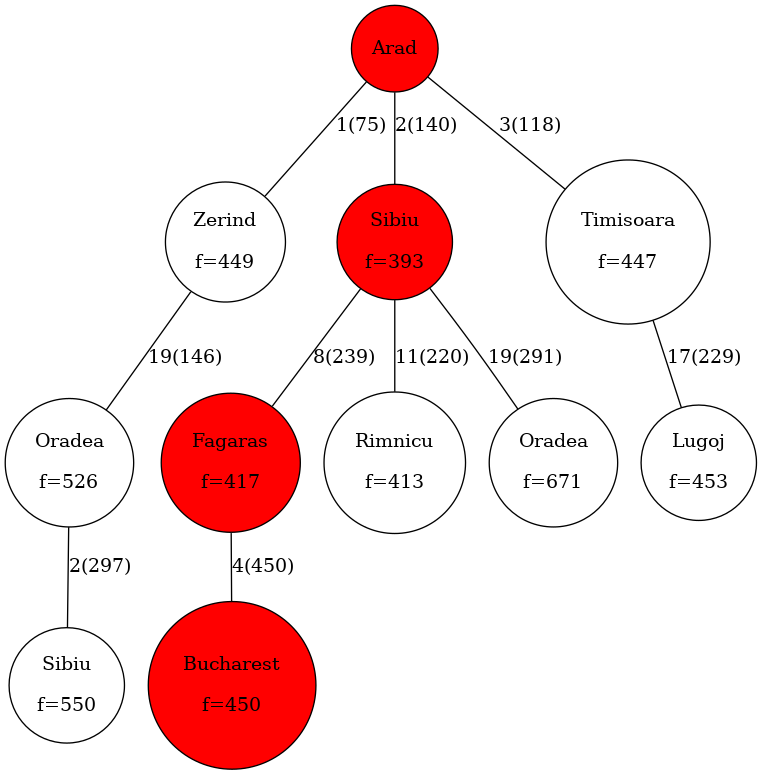

In [15]:
# Solución por el metodo primero a lo ancho
rumaniaStart = RomaniaProblem(value="inicio",state=rumania_initial_state,operators=rumania_operators)
rumaniaProblem = Tree(rumaniaStart, operators=rumania_operators)
objective = rumaniaProblem.breadthFirst(rumania_goal_state)
path=rumaniaProblem.printPath(objective)
graph=rumaniaProblem.draw(path.copy())
tree_image = Image(graph.create_png(), width=500, height=500)
display(tree_image)

 Arad
operador:  Zerind 	 estado: Zerind
operador:  Oradea 	 estado: Oradea
operador:  Sibiu 	 estado: Sibiu
operador:  Fagaras 	 estado: Fagaras
operador:  Bucharest 	 estado: Bucharest


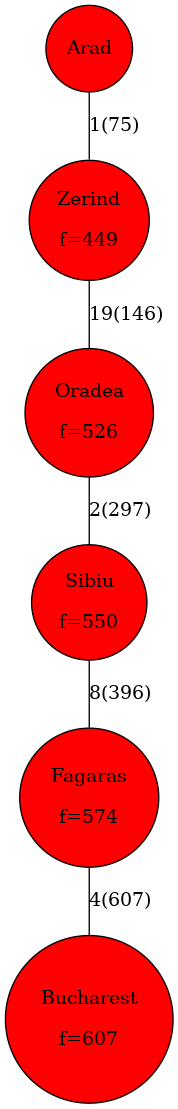

In [16]:
# Solución por el metodo primero a lo profundo
rumaniaStart = RomaniaProblem(value="inicio",state=rumania_initial_state,operators=rumania_operators)
rumaniaProblem = Tree(rumaniaStart, operators=rumania_operators)
objective = rumaniaProblem.dephFirst(rumania_goal_state)
path=rumaniaProblem.printPath(objective)
graph=rumaniaProblem.draw(path.copy())
tree_image = Image(graph.create_png(), width=500, height=500)
display(tree_image)

 Arad
operador:  Sibiu 	 estado: Sibiu
operador:  Fagaras 	 estado: Fagaras
operador:  Bucharest 	 estado: Bucharest


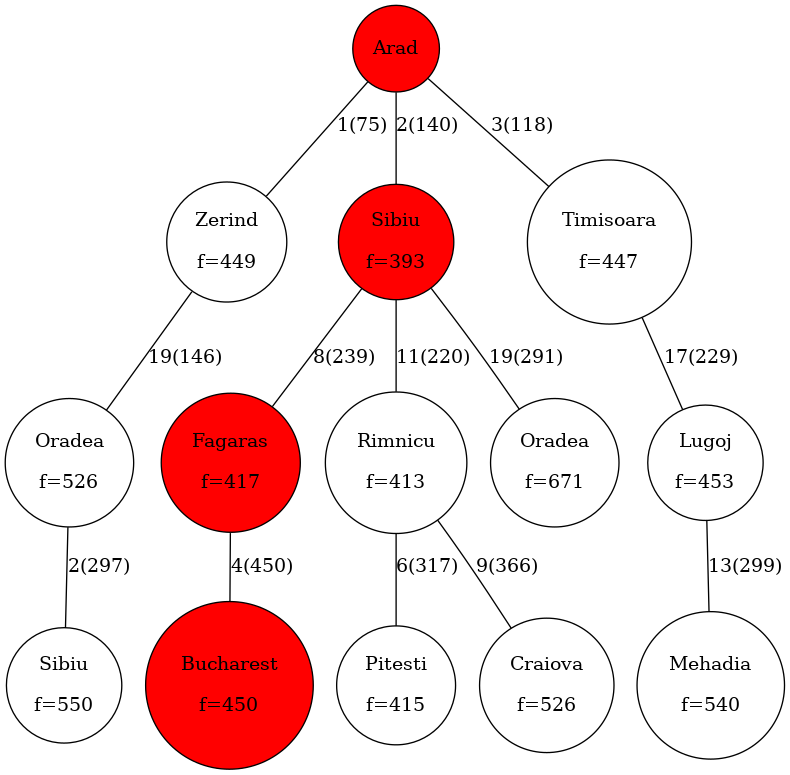

In [17]:
# Solución por el metodo de costo uniforme
rumaniaStart = RomaniaProblem(value="inicio",state=rumania_initial_state,operators=rumania_operators)
rumaniaProblem = Tree(rumaniaStart, operators=rumania_operators)
objective = rumaniaProblem.costUniform(rumania_goal_state)
path=rumaniaProblem.printPath(objective)
graph=rumaniaProblem.draw(path.copy())
tree_image = Image(graph.create_png(), width=500, height=500)
display(tree_image)


 Arad
operador:  Sibiu 	 estado: Sibiu
operador:  Rimnicu 	 estado: Rimnicu
operador:  Pitesti 	 estado: Pitesti
operador:  Bucharest 	 estado: Bucharest


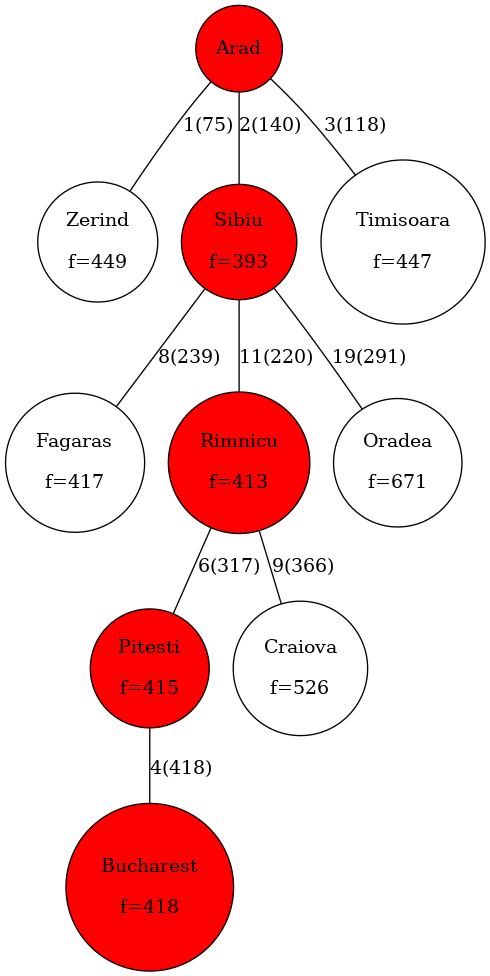

In [18]:
# Solución por el metodo de A*
rumaniaStart = RomaniaProblem(value="inicio",state=rumania_initial_state,operators=rumania_operators)
rumaniaProblem = Tree(rumaniaStart, operators=rumania_operators)
objective = rumaniaProblem.Aasterisk(rumania_goal_state)
path=rumaniaProblem.printPath(objective)
graph=rumaniaProblem.draw(path.copy())
tree_image = Image(graph.create_png(), width=500, height=500)
display(tree_image)